In [1]:
import matplotlib.pyplot as plt
import matplotlib as matplt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
import math
import statistics
import tables

np.set_printoptions(precision=3, suppress=True)

from matplotlib.gridspec import GridSpec

* Profile the READ tasks as well

### GFlops

```
[****] TIME(s)      3.22098 : dgemm     PxQxg=   2 2   4 NB= 1000 N=   20000 :    4967.436444 gflops - ENQ&PROG&DEST      3.66241 :    4368.703656 gflops - ENQ      0.28749 - DEST      0.15395
[****] TIME(s)      6.02851 : dgemm     PxQxg=   2 2   4 NB= 1000 N=   20000 :    2654.056578 gflops - ENQ&PROG&DEST      6.46031 :    2476.662532 gflops - ENQ      0.28386 - DEST      0.14794
[****] TIME(s)      2.87919 : dgemm     PxQxg=   2 2   4 NB= 1000 N=   20000 :    5557.111294 gflops - ENQ&PROG&DEST      4.54857 :    3517.588002 gflops - ENQ      1.51079 - DEST      0.15858
[****] TIME(s)      1.87453 : dgemm     PxQxg=   2 2   4 NB= 1000 N=   20000 :    8535.453872 gflops - ENQ&PROG&DEST      3.27446 :    4886.309225 gflops - ENQ      1.25257 - DEST      0.14735
[****] TIME(s)      1.22998 : dgemm     PxQxg=   2 2   4 NB= 1000 N=   20000 :   13008.321082 gflops - ENQ&PROG&DEST      2.02987 :    7882.291363 gflops - ENQ      0.65180 - DEST      0.14809
[****] TIME(s)      1.14327 : dgemm     PxQxg=   2 2   4 NB= 1000 N=   20000 :   13994.967303 gflops - ENQ&PROG&DEST      2.56529 :    6237.117040 gflops - ENQ      1.27663 - DEST      0.14539
[****] TIME(s)      1.04338 : dgemm     PxQxg=   2 2   4 NB= 1000 N=   20000 :   15334.839998 gflops - ENQ&PROG&DEST      1.88256 :    8499.061577 gflops - ENQ      0.70343 - DEST      0.13575
[****] TIME(s)      2.08452 : dgemm     PxQxg=   2 2   4 NB= 1000 N=   20000 :    7675.632591 gflops - ENQ&PROG&DEST      2.60477 :    6142.578289 gflops - ENQ      0.38905 - DEST      0.13120
[****] TIME(s)      1.28172 : dgemm     PxQxg=   2 2   4 NB= 1000 N=   20000 :   12483.235415 gflops - ENQ&PROG&DEST      1.68951 :    9470.223600 gflops - ENQ      0.27398 - DEST      0.13380
[****] TIME(s)      1.61039 : dgemm     PxQxg=   2 2   4 NB= 1000 N=   20000 :    9935.503277 gflops - ENQ&PROG&DEST      2.28172 :    7012.245610 gflops - ENQ      0.53835 - DEST      0.13298
[****] TIME(s)      1.01597 : dgemm     PxQxg=   2 2   4 NB= 1000 N=   20000 :   15748.437204 gflops - ENQ&PROG&DEST      1.71023 :    9355.480052 gflops - ENQ      0.55533 - DEST      0.13892
[****] TIME(s)      1.16663 : dgemm     PxQxg=   2 2   4 NB= 1000 N=   20000 :   13714.731596 gflops - ENQ&PROG&DEST      1.84482 :    8672.925480 gflops - ENQ      0.54429 - DEST      0.13391
[****] TIME(s)      1.08299 : dgemm     PxQxg=   2 2   4 NB= 1000 N=   20000 :   14773.869282 gflops - ENQ&PROG&DEST      1.49860 :   10676.664587 gflops - ENQ      0.28109 - DEST      0.13451
[****] TIME(s)      1.06064 : dgemm     PxQxg=   2 2   4 NB= 1000 N=   20000 :   15085.250659 gflops - ENQ&PROG&DEST      1.46504 :   10921.178887 gflops - ENQ      0.27076 - DEST      0.13365
[****] TIME(s)      1.04738 : dgemm     PxQxg=   2 2   4 NB= 1000 N=   20000 :   15276.178373 gflops - ENQ&PROG&DEST      2.05948 :    7768.949341 gflops - ENQ      0.87772 - DEST      0.13438
[****] TIME(s)      1.02542 : dgemm     PxQxg=   2 2   4 NB= 1000 N=   20000 :   15603.312843 gflops - ENQ&PROG&DEST      1.74678 :    9159.687183 gflops - ENQ      0.58988 - DEST      0.13148
[****] TIME(s)      1.04373 : dgemm     PxQxg=   2 2   4 NB= 1000 N=   20000 :   15329.689608 gflops - ENQ&PROG&DEST      1.46704 :   10906.327045 gflops - ENQ      0.29017 - DEST      0.13314
[****] TIME(s)      1.71460 : dgemm     PxQxg=   2 2   4 NB= 1000 N=   20000 :    9331.621583 gflops - ENQ&PROG&DEST      2.12741 :    7520.882818 gflops - ENQ      0.27937 - DEST      0.13344
[****] TIME(s)      1.23063 : dgemm     PxQxg=   2 2   4 NB= 1000 N=   20000 :   13001.466523 gflops - ENQ&PROG&DEST      1.63325 :    9796.396346 gflops - ENQ      0.26910 - DEST      0.13352
[****] TIME(s)      1.04708 : dgemm     PxQxg=   2 2   4 NB= 1000 N=   20000 :   15280.525065 gflops - ENQ&PROG&DEST      1.49989 :   10667.415171 gflops - ENQ      0.31919 - DEST      0.13362

```

In [2]:
read_0_hd5 = pd.HDFStore("./traces/GEMM_read-0.prof.h5")
read_0_events = read_0_hd5.events
read_0_hd5.close()

read_1_hd5 = pd.HDFStore("./traces/GEMM_read-1.prof.h5")
read_1_events = read_1_hd5.events
read_1_hd5.close()

read_2_hd5 = pd.HDFStore("./traces/GEMM_read-2.prof.h5")
read_2_events = read_2_hd5.events
read_2_hd5.close()

read_3_hd5 = pd.HDFStore("./traces/GEMM_read-3.prof.h5")
read_3_events = read_3_hd5.events
read_3_hd5.close()


In [3]:
GEMM_task_class_id   = 5
READ_C_task_class_id = 3
READ_B_task_class_id = 2
READ_A_task_class_id = 0

In [4]:
def filter_data_frame_class(df, class_id):
   
    df = df.astype(float)
      
    # remove first run
    df = df.loc[ df['taskpool_id'] > 8 ] 
    
    if(class_id > -1):
        df = df.loc[ df['tcid'] == class_id ] 

    
    df.reset_index(drop=True, inplace=True)
    

    
    return df





In [5]:
read_2_events.columns

Index(['nb_first_stage_in_h2d', 'taskpool_id', 'first_stage_in_time_end',
       'nb_sec_stage_in_d2d', 'stage_out_time_start', 'nb_first_stage_in_d2d',
       'trc', 'tp_nb_tasks', 'task_count', 'task_type',
       'sec_stage_in_time_start', 'nb_first_stage_in', 'complete_time_end',
       'nb_sec_stage_in_h2d', 'device_index', 'priority', 'second_queue_time',
       'exec_time_end', 'exec_stream_index', 'loc_C', 'node_id',
       'first_stage_in_time_start', 'exec_time_start', 'first_waiting_tasks',
       'id', 'nb_sec_stage_in', 'n', 'clock_speed', 'ready_tasks',
       'task_progress', 'select_time', 'sec_stage_in_time_end',
       'complete_time_start', 'first_queue_time', 'mig_status', 'end',
       'class_id', 'begin', 'stage_out_time_end', 'type', 'complete_time', 'm',
       'tcid', 'dc_key', 'sec_waiting_tasks', 'flags', 'dc_dataid',
       'stream_id', 'tpid', 'dst', 'src', 'msg_size', 'tid', 'k', 'dc_padding',
       'loc_A', 'size', 'loc_B', 'data_key', 'dc_id'],
      dt

In [6]:
tp_id = [10., 12., 14., 16., 22., 24., 26., 28., 30., 32., 34., 36., 38.,
       42., 44., 46., 18., 20., 40.]

In [7]:
# fast taskpool

good_tp = 44

df_read_A_0 = filter_data_frame_class(read_0_events, 0)
df_read_A_0_fast_tp = df_read_A_0.loc[ df_read_A_0['taskpool_id'] == good_tp]

df_read_B_0 = filter_data_frame_class(read_0_events, 2)
df_read_B_0_fast_tp = df_read_B_0.loc[ df_read_B_0['taskpool_id'] == good_tp]

df_read_C_0 = filter_data_frame_class(read_0_events, 3)
df_read_C_0_fast_tp = df_read_C_0.loc[ df_read_C_0['taskpool_id'] == good_tp]

df_read_A_1 = filter_data_frame_class(read_1_events, 0)
df_read_A_1_fast_tp = df_read_A_1.loc[ df_read_A_1['taskpool_id'] == good_tp]

df_read_B_1 = filter_data_frame_class(read_1_events, 2)
df_read_B_1_fast_tp = df_read_B_1.loc[ df_read_B_1['taskpool_id'] == good_tp]

df_read_C_1 = filter_data_frame_class(read_1_events, 3)
df_read_C_1_fast_tp = df_read_C_1.loc[ df_read_C_1['taskpool_id'] == good_tp]

df_read_A_2 = filter_data_frame_class(read_2_events, 0)
df_read_A_2_fast_tp = df_read_A_2.loc[ df_read_A_2['taskpool_id'] == good_tp]

df_read_B_2 = filter_data_frame_class(read_2_events, 2)
df_read_B_2_fast_tp = df_read_B_2.loc[ df_read_B_2['taskpool_id'] == good_tp]

df_read_C_2 = filter_data_frame_class(read_2_events, 3)
df_read_C_2_fast_tp = df_read_C_2.loc[ df_read_C_2['taskpool_id'] == good_tp]

df_read_A_3 = filter_data_frame_class(read_3_events, 0)
df_read_A_3_fast_tp = df_read_A_3.loc[ df_read_A_3['taskpool_id'] == good_tp]

df_read_B_3 = filter_data_frame_class(read_3_events, 2)
df_read_B_3_fast_tp = df_read_B_3.loc[ df_read_B_3['taskpool_id'] == good_tp]

df_read_C_3 = filter_data_frame_class(read_3_events, 3)
df_read_C_3_fast_tp = df_read_C_3.loc[ df_read_C_3['taskpool_id'] == good_tp]





In [8]:
# slow taskpool

bad_tp = 12

df_read_A_0 = filter_data_frame_class(read_0_events, 0)
df_read_A_0_slow_tp = df_read_A_0.loc[ df_read_A_0['taskpool_id'] == bad_tp]

df_read_B_0 = filter_data_frame_class(read_0_events, 2)
df_read_B_0_slow_tp = df_read_B_0.loc[ df_read_B_0['taskpool_id'] == bad_tp]

df_read_C_0 = filter_data_frame_class(read_0_events, 3)
df_read_C_0_slow_tp = df_read_C_0.loc[ df_read_C_0['taskpool_id'] == bad_tp]

df_read_A_1 = filter_data_frame_class(read_1_events, 0)
df_read_A_1_slow_tp = df_read_A_1.loc[ df_read_A_1['taskpool_id'] == bad_tp]

df_read_B_1 = filter_data_frame_class(read_1_events, 2)
df_read_B_1_slow_tp = df_read_B_1.loc[ df_read_B_1['taskpool_id'] == bad_tp]

df_read_C_1 = filter_data_frame_class(read_1_events, 3)
df_read_C_1_slow_tp = df_read_C_1.loc[ df_read_C_1['taskpool_id'] == bad_tp]

df_read_A_2 = filter_data_frame_class(read_2_events, 0)
df_read_A_2_slow_tp = df_read_A_2.loc[ df_read_A_2['taskpool_id'] == bad_tp]

df_read_B_2 = filter_data_frame_class(read_2_events, 2)
df_read_B_2_slow_tp = df_read_B_2.loc[ df_read_B_2['taskpool_id'] == bad_tp]

df_read_C_2 = filter_data_frame_class(read_2_events, 3)
df_read_C_2_slow_tp = df_read_C_2.loc[ df_read_C_2['taskpool_id'] == bad_tp]

df_read_A_3 = filter_data_frame_class(read_3_events, 0)
df_read_A_3_slow_tp = df_read_A_3.loc[ df_read_A_3['taskpool_id'] == bad_tp]

df_read_B_3 = filter_data_frame_class(read_3_events, 2)
df_read_B_3_slow_tp = df_read_B_3.loc[ df_read_B_3['taskpool_id'] == bad_tp]

df_read_C_3 = filter_data_frame_class(read_3_events, 3)
df_read_C_3_slow_tp = df_read_C_3.loc[ df_read_C_3['taskpool_id'] == bad_tp]



Text(0.5, 0, 'Execution time(ns)')

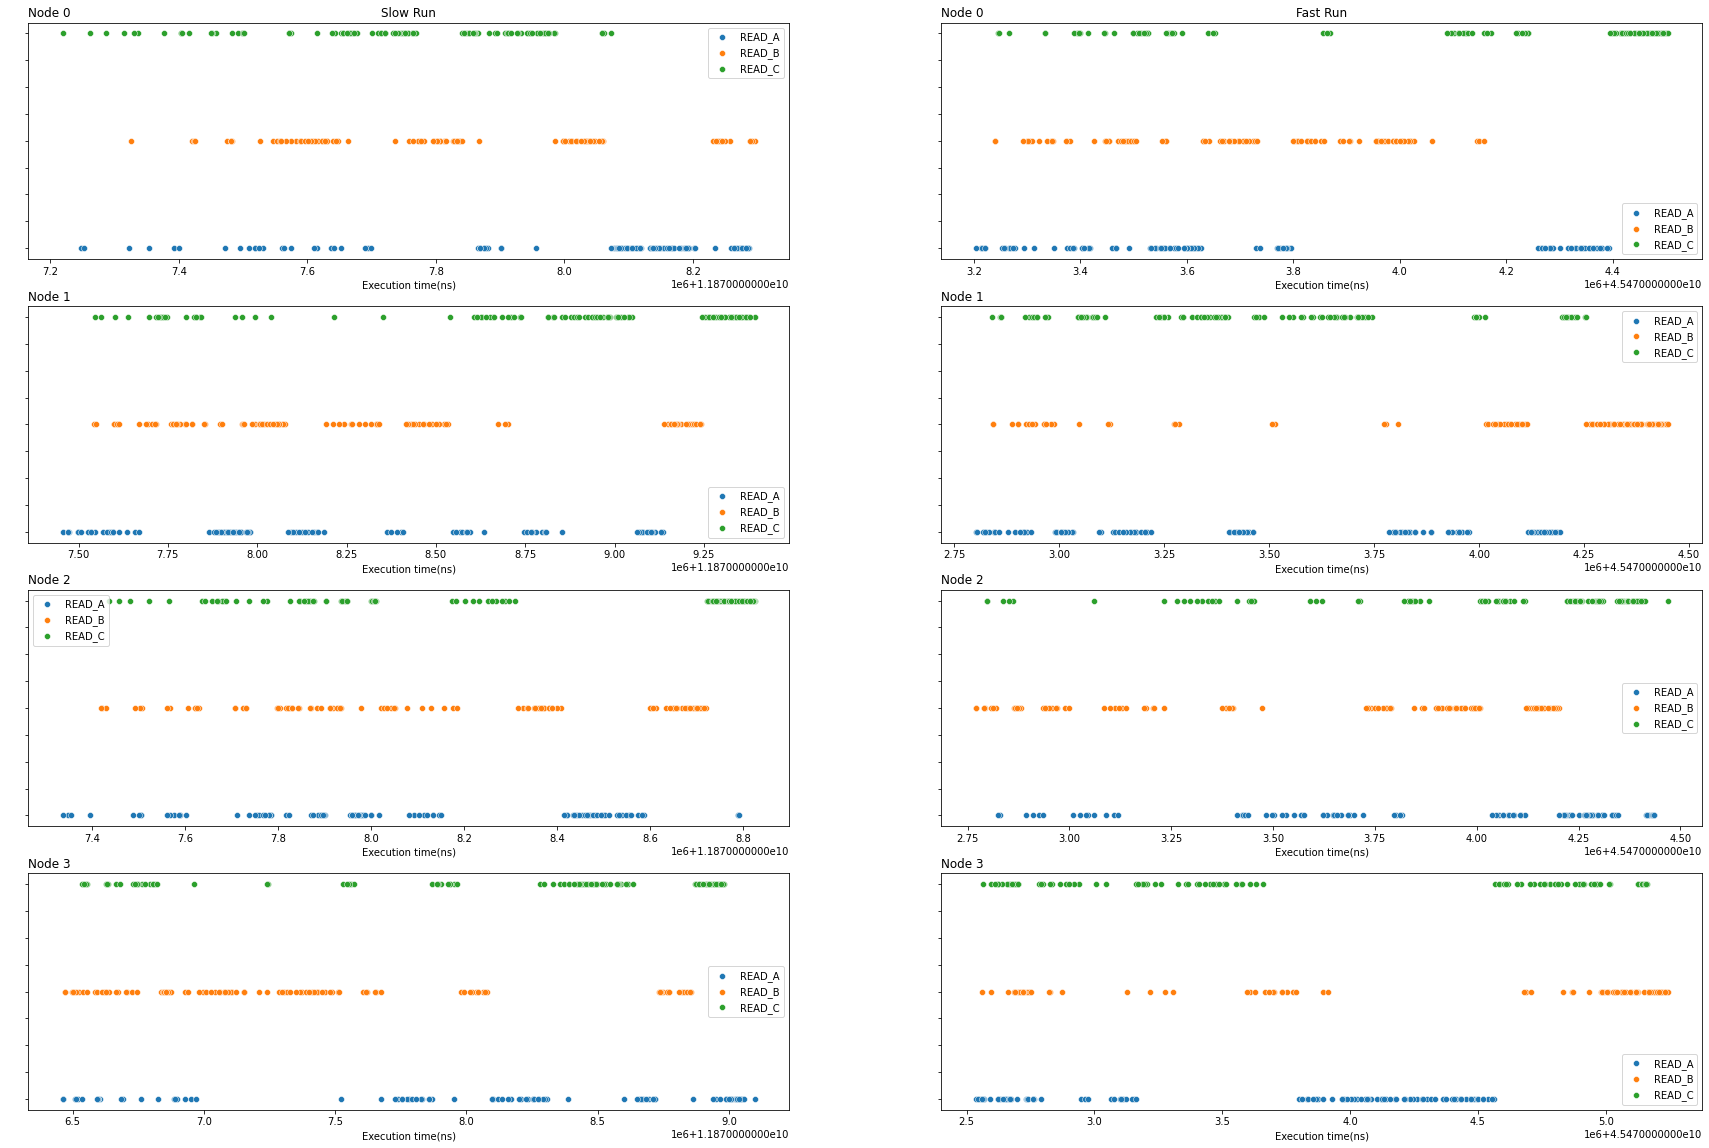

In [9]:
fig = plt.figure(figsize=(30, 20))
gs = GridSpec(nrows=4, ncols=2)

ax0 = fig.add_subplot(gs[0, 0])
sns.scatterplot(data=df_read_A_0_slow_tp, x="begin", y=1, label='READ_A', ax=ax0).set_title("Node 0", loc='left')

sns.scatterplot(data=df_read_B_0_slow_tp, x="begin", y=2, label='READ_B', ax=ax0).set_title("Node 0", loc='left')

sns.scatterplot(data=df_read_C_0_slow_tp, x="begin", y=3, label='READ_C', ax=ax0).set_title("Node 0", loc='left')

ax0.set_ylabel(' ')
ax0.set_yticklabels([])
ax0.set_xlabel('Execution time(ns)')
ax0.set_title('Slow Run')



ax1 = fig.add_subplot(gs[1, 0])
sns.scatterplot(data=df_read_A_1_slow_tp, x="begin", y=1, label='READ_A', ax=ax1).set_title("Node 1", loc='left')

sns.scatterplot(data=df_read_B_1_slow_tp, x="begin", y=2, label='READ_B', ax=ax1).set_title("Node 1", loc='left')

sns.scatterplot(data=df_read_C_1_slow_tp, x="begin", y=3, label='READ_C', ax=ax1).set_title("Node 1", loc='left')

ax1.set_ylabel(' ')
ax1.set_yticklabels([])
ax1.set_xlabel('Execution time(ns)')


ax2 = fig.add_subplot(gs[2, 0])
sns.scatterplot(data=df_read_A_2_slow_tp, x="begin", y=1, label='READ_A', ax=ax2).set_title("Node 2", loc='left')

sns.scatterplot(data=df_read_B_2_slow_tp, x="begin", y=2, label='READ_B', ax=ax2).set_title("Node 2", loc='left')

sns.scatterplot(data=df_read_C_2_slow_tp, x="begin", y=3, label='READ_C', ax=ax2).set_title("Node 2", loc='left')

ax2.set_ylabel(' ')
ax2.set_yticklabels([])
ax2.set_xlabel('Execution time(ns)')



ax3 = fig.add_subplot(gs[3, 0])
sns.scatterplot(data=df_read_A_3_slow_tp, x="begin", y=1, label='READ_A', ax=ax3).set_title("Node 3", loc='left')

sns.scatterplot(data=df_read_B_3_slow_tp, x="begin", y=2, label='READ_B', ax=ax3).set_title("Node 3", loc='left')

sns.scatterplot(data=df_read_C_3_slow_tp, x="begin", y=3, label='READ_C', ax=ax3).set_title("Node 3", loc='left')

ax3.set_ylabel(' ')
ax3.set_yticklabels([])
ax3.set_xlabel('Execution time(ns)')


########

ax4 = fig.add_subplot(gs[0,1])
sns.scatterplot(data=df_read_A_0_fast_tp, x="begin", y=1, label='READ_A', ax=ax4).set_title("Node 0", loc='left')

sns.scatterplot(data=df_read_B_0_fast_tp, x="begin", y=2, label='READ_B', ax=ax4).set_title("Node 0", loc='left')

sns.scatterplot(data=df_read_C_0_fast_tp, x="begin", y=3, label='READ_C', ax=ax4).set_title("Node 0", loc='left')

ax4.set_ylabel(' ')
ax4.set_yticklabels([])
ax4.set_xlabel('Execution time(ns)')
ax4.set_title('Fast Run')



ax5 = fig.add_subplot(gs[1, 1])
sns.scatterplot(data=df_read_A_1_fast_tp, x="begin", y=1, label='READ_A', ax=ax5).set_title("Node 1", loc='left')

sns.scatterplot(data=df_read_B_1_fast_tp, x="begin", y=2, label='READ_B', ax=ax5).set_title("Node 1", loc='left')

sns.scatterplot(data=df_read_C_1_fast_tp, x="begin", y=3, label='READ_C', ax=ax5).set_title("Node 1", loc='left')

ax5.set_ylabel(' ')
ax5.set_yticklabels([])
ax5.set_xlabel('Execution time(ns)')


ax6 = fig.add_subplot(gs[2, 1])
sns.scatterplot(data=df_read_A_2_fast_tp, x="begin", y=1, label='READ_A', ax=ax6).set_title("Node 2", loc='left')

sns.scatterplot(data=df_read_B_2_fast_tp, x="begin", y=2, label='READ_B', ax=ax6).set_title("Node 2", loc='left')

sns.scatterplot(data=df_read_C_2_fast_tp, x="begin", y=3, label='READ_C', ax=ax6).set_title("Node 2", loc='left')

ax6.set_ylabel(' ')
ax6.set_yticklabels([])
ax6.set_xlabel('Execution time(ns)')

ax7 = fig.add_subplot(gs[3, 1])
sns.scatterplot(data=df_read_A_3_fast_tp, x="begin", y=1, label='READ_A', ax=ax7).set_title("Node 3", loc='left')

sns.scatterplot(data=df_read_B_3_fast_tp, x="begin", y=2, label='READ_B', ax=ax7).set_title("Node 3", loc='left')

sns.scatterplot(data=df_read_C_3_fast_tp, x="begin", y=3, label='READ_C', ax=ax7).set_title("Node 3", loc='left')

ax7.set_ylabel(' ')
ax7.set_yticklabels([])
ax7.set_xlabel('Execution time(ns)')

#plt.savefig('READ_tasks_combined.jpeg')